In [1]:
import numpy as np

In [2]:
fruits = np.load('../data/fruits.npy')
fruits.shape

(300, 100, 100)

In [3]:
# image 확인
import matplotlib.pyplot as plt

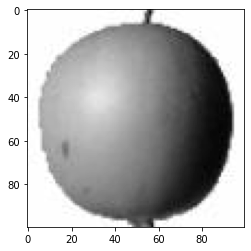

In [4]:
plt.imshow(fruits[0].reshape(100,100), cmap='gray_r')
plt.show()

In [5]:
# Target 만들기
target = np.concatenate([np.zeros(100), np.ones(100), np.full(100, 2)])
target.shape

(300,)

In [6]:
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [7]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

### Train Test 분류하기

In [8]:
train=fruits.reshape(-1, 100, 100, 1) / 255.0

trainData, testData, trainTarget, testTarget = train_test_split(
    train, target, test_size=0.2, random_state=45
)
trainData, valData, trainTarget, valTarget = train_test_split(
    trainData, trainTarget, test_size=0.2, random_state=45
)

In [9]:
trainData.shape, trainTarget.shape, valData.shape, valTarget.shape

((192, 100, 100, 1), (192,), (48, 100, 100, 1), (48,))

---
### CNN 만들기

In [10]:
model = keras.Sequential()

2022-07-21 12:51:39.497620: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.add(
    keras.layers.Conv2D(
        16, kernel_size=3, activation='relu', padding='same', input_shape=(100,100,1)
    )
)

In [12]:
model.add(
    keras.layers.MaxPooling2D(2)
)

In [13]:
model.add(
    keras.layers.Conv2D(
        32, kernel_size=3, activation='relu', padding='same'
    )
)

In [14]:
model.add(
    keras.layers.MaxPooling2D(2)
)

In [15]:
# model.add(
#     keras.layers.Conv2D(
#         128, kernel_size=3, activation='relu', padding='same'
#     )
# )

In [16]:
# model.add(
#     keras.layers.MaxPooling2D(2)
# )

In [17]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(3, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 20000)             0         
                                                                 
 dense (Dense)               (None, 100)               2

In [19]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

checkpoint_cb = keras.callbacks.ModelCheckpoint('../data/fruits_best_cnn_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(
    trainData, 
    trainTarget, 
    epochs=20, 
    validation_data=(valData, valTarget),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/20
6/6 [==============================] - 2s 194ms/step - loss: 0.9489 - accuracy: 0.5625 - val_loss: 0.5340 - val_accuracy: 0.9583
Epoch 2/20
6/6 [==============================] - 1s 167ms/step - loss: 0.3934 - accuracy: 0.9271 - val_loss: 0.1425 - val_accuracy: 0.9792
Epoch 3/20
6/6 [==============================] - 1s 157ms/step - loss: 0.1028 - accuracy: 0.9948 - val_loss: 0.0223 - val_accuracy: 1.0000
Epoch 4/20
6/6 [==============================] - 1s 158ms/step - loss: 0.0347 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 5/20
6/6 [==============================] - 1s 152ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 6/20
6/6 [==============================] - 1s 167ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 7.2683e-04 - val_accuracy: 1.0000
Epoch 7/20
6/6 [==============================] - 1s 165ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.7800e-04 - val_accuracy: 1.0000
Epoch 8/20
6

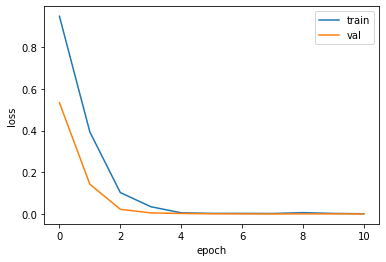

In [20]:
# 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

plt.show()

In [21]:
model.evaluate(valData, valTarget)

2/2 [==============================] - 0s 17ms/step - loss: 5.9791e-05 - accuracy: 1.0000


[5.979072011541575e-05, 1.0]

In [22]:
model.evaluate(testData, testTarget)

2/2 [==============================] - 0s 24ms/step - loss: 2.0143e-04 - accuracy: 1.0000


[0.00020142883295193315, 1.0]